In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv('Advertising.csv')

In [9]:
print(data.head(n=5))

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [10]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


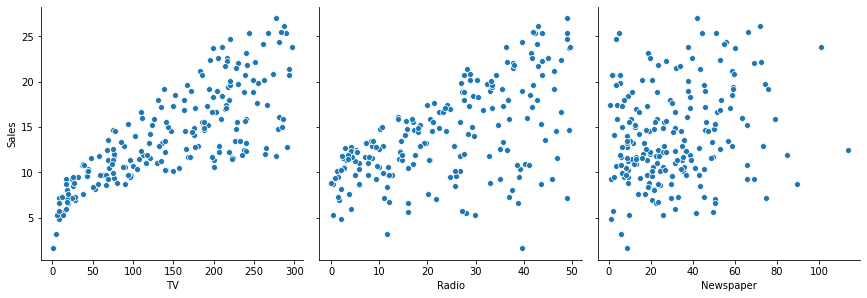

In [11]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars = ['Sales'], height = 4, aspect = 1)

So this data basically shows the sales of product depending upon the amount of money spent in advertisement in TV, radio and newspaper.

The y axis represents the million units of products sold. The x-axis represent the amount spend in millions for advertisement.

Hence the sales depend on many features, and we will predict a liner fit to model the data.

We'll be using the following formula:

y (sales) = $\theta_{0}$ + $\theta_{1}$ x TV + $\theta_{2}$ x radio + $\theta_{3}$ x sales

Hence we need to write a function which predicts us these theta values for us. This is just the same as Liner Regression(my previous notebok) but with multiple variables.

In [35]:
def grad_descent(x,y,lt,iterations):
    x = x.values
    a = []
    
    for i in range(200):
        a.append(1)
    b = np.array(a).reshape((200,1))
    x = np.concatenate((b,x), axis = 1)
    y = y.values
    
    theta = np.random.rand(4).reshape((4,1))*10 
    ## Here I've declared a 4*1 matrix having random values ranging from 1 to 10...
    m = x.shape[0]
    learning_rate = lt
    
    def mean_error(theta, x, j, m):
        sum_mean = 0
        for i in range(m):
            hx = np.dot(np.transpose(theta), x[i])
            sum_mean+=(hx - y[i]) * x[i][j]
        return sum_mean/m 
    
    def perform_cal(theta, x, y, t):
        temp_0 = theta[0] - learning_rate*mean_error(theta,x,0,m)
        temp_1 = theta[1] - learning_rate*mean_error(theta,x,1,m)
        temp_2 = theta[2] - learning_rate*mean_error(theta,x,2,m)
        temp_3 = theta[3] - learning_rate*mean_error(theta,x,3,m)
        
        theta = [temp_0, temp_1, temp_2, temp_3]
        return theta
    for i in range(iterations):
        theta = perform_cal(theta, x, y ,m)
        
    print(theta)    
    


    
    

We will load the data and test the values predicted by our algorithm.

In [36]:
x = data[['TV','Radio','Newspaper']]
y = data['Sales']
print(x.shape)
print(y.shape)

(200, 3)
(200,)


In [37]:
grad_descent(x, y, 0.00006, 2000)

[array([6.92631033]), array([0.03487546]), array([0.14278793]), array([-0.02525716])]


To check the values predicted by our algorithm, let us use scikit learn libraries.

In [40]:
pip install sklearn

     |████████████████████████████████| 6.7 MB 117 kB/s eta 0:00:01
     |████████████████████████████████| 300 kB 205 kB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=74699db0f008d5e21997db8fb8235d0697b2bfa129c3e983782d923448630ae0
  Stored in directory: /home/prubhtej_s/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [41]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x, y)  #passing the data for preparing the model

LinearRegression()

In [42]:

print('Intercept = ',linreg.intercept_)
print(list(zip(x, linreg.coef_)))

Intercept =  2.9388893694594103
[('TV', 0.0457646454553976), ('Radio', 0.18853001691820442), ('Newspaper', -0.0010374930424763007)]


Intercept =  2.938889369459412
[('TV', 0.0457646454553976), ('radio', 0.18853001691820448), ('newspaper', -0.0010374930424763285)]
Intercept = 2.9388

('TV', 0.0576),

('radio', 0.1885),

('newspaper', -0.00103)]

These are the values predicted by scikit learn model.

These are very close to values predicted by our algorithm.

Intercept = 3.157   difference = 0.2182

('TV', 0.0451),   difference = 0.0125

('radio', 0.1860),   difference = 0.0015

('newspaper', -0.00236)]   difference = 0.00103
Hence we were able to run Linear Regression on data with more than one features, and predict a Linear Regression model for it.